## 1. Setup and Load Data

### 1.1 Install dependencies and Setup

In [2]:
!pip install tensorflow tensorflow opencv-python matplotlib #import TF

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.12.0-cp310-cp310-win_amd64.whl (1.9 kB)
  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)
  Using cached tensorflow_intel-2.12.0-cp310-cp310-win_amd64.whl (272.8 MB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached grpcio-1.54.2-cp310-cp310-win_amd64.whl (4.1 MB)
  Using cached jax-0.4.10-py3-none-any.whl
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached protobuf-4.23.2-cp310-abi3-win_amd64.whl (422 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
  Using cached ml_dtypes-0.1.0-cp310-cp310-win_amd64.whl (1

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
!pip list #check if TF is imported

Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binary

In [3]:
import tensorflow as tf #install dependencies
import os #used to navigate thru file structures

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True) #tells to use minimum memory

In [5]:
tf.config.list_physical_devices('GPU')

[]

### 1.2 Remove dodgy images

In [6]:
import cv2 #import opencv
import imghdr #allows us to check file extensions for the imgs
from matplotlib import pyplot as plt

In [7]:
data_dir = 'data' #creates a var that points to the data folder

In [8]:
os.listdir(os.path.join(data_dir,'happy'))

['05-12-21-happy-people.jpg',
 '07-120104-happy_people_are_not_nice_people.jpg',
 '1-2.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '11-Habits-of-Truly-Happy-People.jpg',
 '154006829.jpg',
 '170404-happy-workers-feature.jpg',
 '1902539.jpg',
 '1902540.jpg',
 '1902587.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '227-2271622_happy-people-business-team-celebrating-png.png',
 '7-Habits-of-Happy-People-image.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg',
 '8cxKy5g9i.jpg',
 '960x0.jpg',
 'A_Sep20_14_1189155141.jpg',
 'bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg',
 'blog_image_20180219221810890.jpg',
 'brady-bunch-3.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 'fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg',
 'friends-happy-190821-800x450.jpg',
 'GettyImages-565706549-949x534.jpg',
 'GettyImages-871518740-1024x707.jpg',
 'ge

In [9]:
image_exts = ['jpeg','jpg','bmp','png'] #creates a list of diff img extensions

In [11]:
image_exts[0]

'jpeg'

In [12]:
for image_class in os.listdir(data_dir):
     for image in os.listdir(os.path.join(data_dir, image_class)):
            print(image)

05-12-21-happy-people.jpg
07-120104-happy_people_are_not_nice_people.jpg
1-2.jpg
1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
11-Habits-of-Truly-Happy-People.jpg
154006829.jpg
170404-happy-workers-feature.jpg
1902539.jpg
1902540.jpg
1902587.jpg
1920px-face-smile.svg_.png.jpg
1HEoLBLidT2u4mhJ0oiDgig.png
227-2271622_happy-people-business-team-celebrating-png.png
7-Habits-of-Happy-People-image.jpeg
7-principles-of-successful-and-happy-people.png
7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg
8cxKy5g9i.jpg
960x0.jpg
A_Sep20_14_1189155141.jpg
bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg
blog_image_20180219221810890.jpg
brady-bunch-3.jpg
e162ccda8ce0f197f8863f327add9233.jpg
fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg
friends-happy-190821-800x450.jpg
GettyImages-565706549-949x534.jpg
GettyImages-871518740-1024x707.jpg
getty_152414899_97046097045006_68075.jpg
getty_478389113_970647970450091_99776.jpg
getty_494581822_130796.jpg
ge

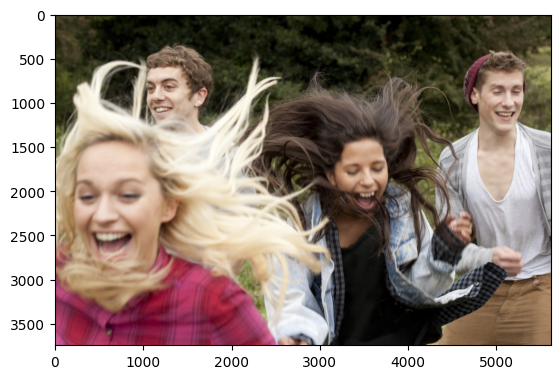

In [13]:
img = cv2.imread(os.path.join('data','happy','154006829.jpg'))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) #converts 2 rgb as cv2 reads img in bgr
plt.show()

In [15]:
for image_class in os.listdir(data_dir): #looping thru every folder in data dir(happy, sad)
    for image in os.listdir(os.path.join(data_dir, image_class)): #looping thru every img inside the sub dirs
        image_path = os.path.join(data_dir, image_class, image) #loads each img paths
        try: 
            img = cv2.imread(image_path) #load img into opencv--opens up an img in opencv
            tip = imghdr.what(image_path) #checks that img matches one of the extensions
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path) #removes the img if extension not in list
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

### 1.3 Load Data

In [16]:
tf.data.Dataset #allows to build pipeline

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [17]:
import numpy as np
from matplotlib import pyplot as plt #two new dependencies imported

In [24]:
data = tf.keras.utils.image_dataset_from_directory('data') #builds an img dataset & does some preprocessing--building data pipeline

Found 174 files belonging to 2 classes.


In [25]:
data_iterator = data.as_numpy_iterator() #allows to loop thru data pipeline

In [26]:
#get another batch of data
batch = data_iterator.next() #allows access of data pipeline

In [27]:
len(batch)  #two parts to the datasets(imgs,labels)
batch[0].shape #imgs represented as numpy arrs

(32, 256, 256, 3)

In [28]:
batch[1] #1 is either h or s, 0 is either h or s
#class 1=s, class 0=h

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1])

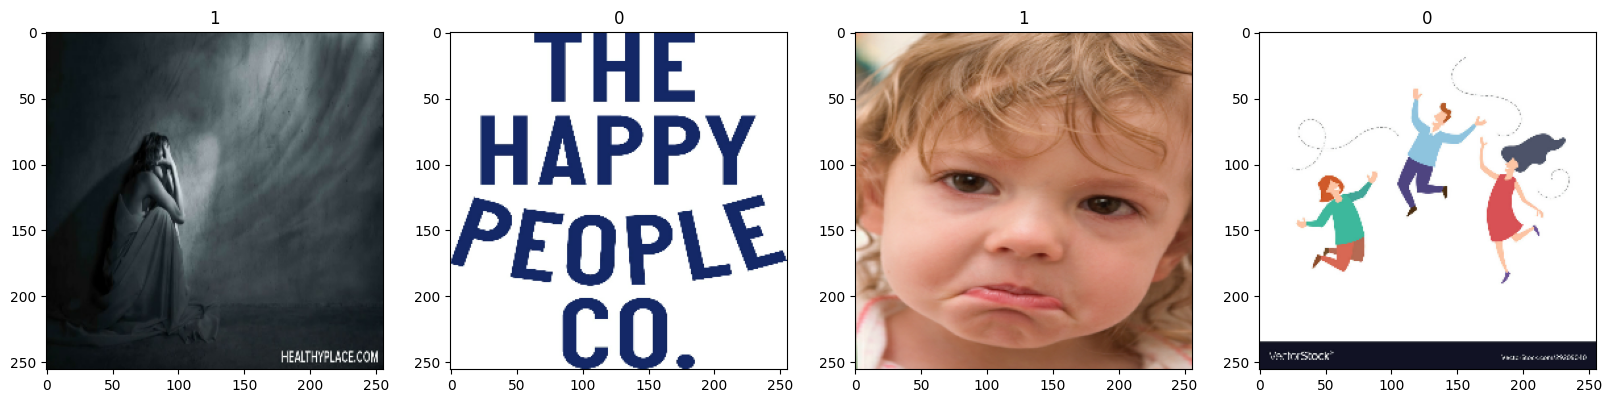

In [29]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20)) #using subplots func of matplotlib to plot out in specific dimension
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx]) #checks which flag is assigned to which type

In [30]:
batch[0].max() #img size bw 0-255
#To work faster data should be as small as possible--preprocessing needed to scale data bw 0-1--divide by 255

255.0

## 2. Preprocess Data

### 2.1 Scale Data

In [31]:
data = data.map(lambda x,y: (x/255,y)) #allows perform transformation inside pipeline--x r imgs, y r target vars

In [32]:
batch = data.as_numpy_iterator().next()#loads next batch like before--wo creating new var for each one

In [35]:
#checking
batch[0].max()

1.0

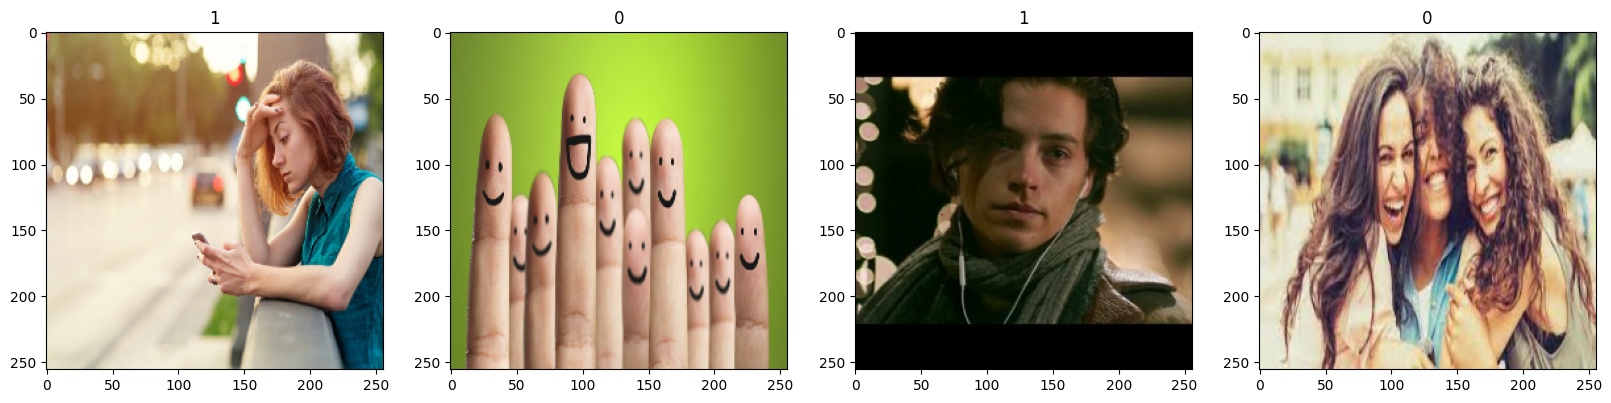

In [36]:
#checking
fig, ax = plt.subplots(ncols=4, figsize=(20,20)) #using subplots func of matplotlib to plot out in specific dimension
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img) #imgs r bw 0-1, astype int will turn them all black
    ax[idx].title.set_text(batch[1][idx]) 

### 2.2 Split Data

In [37]:
#checking
len(data)

6

In [38]:
train_size = int(len(data)*.7) #training set will be 70% of the total data--data used to train the model
val_size = int(len(data)*.2) #validation will be 20%--data used to validate the model
test_size = int(len(data)*.1)+1 #size will be 10%(as it's coming 0)--date used to test the model

In [39]:
#checking
train_size+val_size+test_size

6

In [40]:
#Take defines how much data we're going to take in that partition
train = data.take(train_size) #saying how many batches we wanna allocate to training data
val = data.skip(train_size).take(val_size) #skips the batched allocated to train then allocates the next 1 batch to val
test = data.skip(train_size+val_size).take(test_size)

In [42]:
#checking
len(train)

4

## 3. Deep Model

### 3.1 Build Deep Learning Model

In [43]:
#import dependencies
from tensorflow.keras.models import Sequential #great if model has 1 ip, 1 op and flows top to bottom--quick,easy
#another type: Functional--for multiple ip,op,conns
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout #import bunch of layers
#cnn layer, condensing layer--returns max val of a region, reduces cnn layer back into a format that dense layer is able to take--to get 1 op,
#dropout--regularization layer

In [46]:
#establishing sequential class
model = Sequential()

In [47]:
#add layers
#2 cnn layers, 1 flatten layer, 2 dense layers


model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3))) #adding a conv layer--has 16 filts with 3x3 px size, moves 1 px each time(stride)
#--using ReLU act func(converts any neg val to 0 nd non0 vals r unchanged)--passing 1st layer as input
model.add(MaxPooling2D()) #apply mp layer--takes the max val after the relu act nd returns that val--condenses the info--halves the op

model.add(Conv2D(32, (3,3), 1, activation='relu')) #add anothr conv func--32 filts with 3x3px size, stride 1, relu act
model.add(MaxPooling2D()) 

model.add(Conv2D(16, (3,3), 1, activation='relu')) #another same conv block
model.add(MaxPooling2D())

model.add(Flatten()) #flattening(converts into single dimension)--condense h nd w nd no of filts will form the channel val--flattens to a single val

#fully connected layers
model.add(Dense(256, activation='relu')) #256 vals as our op
model.add(Dense(1, activation='sigmoid')) #1 val as our op--op will be 0 or 1(as using sigmoid--sigmoid converts each val in a range bw 0 nd 1)

In [48]:
#compiles
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy']) #using adam optimizer--specifying what our loss is
#--the metric we wanna track: accuracy(tells how well model is classifying as 0 or 1)

In [50]:
model.summary() #to see how our model transforms the data

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)      

### 3.2 Train

In [51]:
logdir='logs' #create var that points to the log directory

In [52]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir) #logs at model training as a training
#--we can comeback nd see how it performed nd all

In [53]:
#fits our model
# there r 2--fit(training component) nd predict(is when we make predictions)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback]) #take in our training data(4 bactches of 32 img each)
#--epoch is how long we're going to train for(1 epoch is 1 run over entire training set of data)--pass thru val data(after training we can see
# how well model is performing in real time)--pass our callback

Epoch 1/20
4/4 [==============================] - 21s 3s/step - loss: 1.5024 - accuracy: 0.5469 - val_loss: 1.9261 - val_accuracy: 0.2812
Epoch 2/20
4/4 [==============================] - 16s 3s/step - loss: 0.8838 - accuracy: 0.5234 - val_loss: 0.6643 - val_accuracy: 0.5938
Epoch 3/20
4/4 [==============================] - 16s 3s/step - loss: 0.7050 - accuracy: 0.5547 - val_loss: 0.7315 - val_accuracy: 0.5000
Epoch 4/20
4/4 [==============================] - 16s 3s/step - loss: 0.6539 - accuracy: 0.5781 - val_loss: 0.6263 - val_accuracy: 0.7188
Epoch 5/20
4/4 [==============================] - 16s 3s/step - loss: 0.6619 - accuracy: 0.6328 - val_loss: 0.6387 - val_accuracy: 0.7812
Epoch 6/20
4/4 [==============================] - 16s 3s/step - loss: 0.6484 - accuracy: 0.7031 - val_loss: 0.6079 - val_accuracy: 0.6562
Epoch 7/20
4/4 [==============================] - 16s 3s/step - loss: 0.6021 - accuracy: 0.6953 - val_loss: 0.5801 - val_accuracy: 0.6562
Epoch 8/20
4/4 [==================

In [55]:
#checking
hist.history

{'loss': [1.5024093389511108,
  0.8838298320770264,
  0.7049514055252075,
  0.6538611650466919,
  0.6619387269020081,
  0.6483887434005737,
  0.6020993590354919,
  0.5671291351318359,
  0.5227425694465637,
  0.4578554332256317,
  0.41652390360832214,
  0.33087295293807983,
  0.3103753328323364,
  0.3116806745529175,
  0.27096840739250183,
  0.19879430532455444,
  0.1472190022468567,
  0.10787269473075867,
  0.07483109831809998,
  0.0881463885307312],
 'accuracy': [0.546875,
  0.5234375,
  0.5546875,
  0.578125,
  0.6328125,
  0.703125,
  0.6953125,
  0.6953125,
  0.75,
  0.8046875,
  0.8359375,
  0.890625,
  0.890625,
  0.859375,
  0.8828125,
  0.96875,
  0.96875,
  0.984375,
  0.984375,
  0.9765625],
 'val_loss': [1.9261494874954224,
  0.6643342971801758,
  0.7315047979354858,
  0.6263075470924377,
  0.6386967897415161,
  0.6078771352767944,
  0.5800967216491699,
  0.5117936134338379,
  0.4231175184249878,
  0.33013415336608887,
  0.37154078483581543,
  0.491955041885376,
  0.22067886

### 3.3 Plot Performance

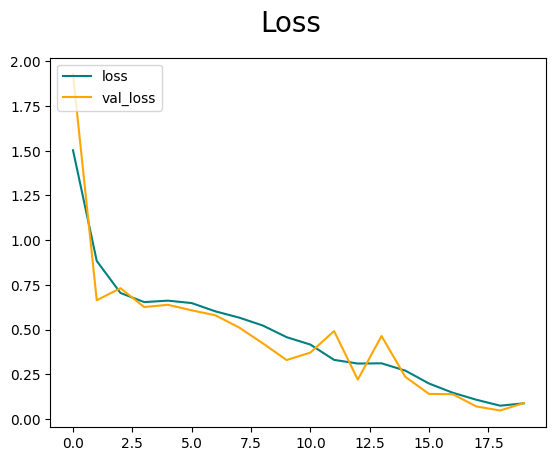

In [57]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss') #plotting training loss in teal
plt.plot(hist.history['val_loss'], color='orange', label='val_loss') #plotting validation loss in orange
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()
#if we see loss going down but val_loss going up:model maybe overfitting--regularization can be applied to solve or change some data
#if no decreasing or going going weird:need to look at training data or consider a larger neural network

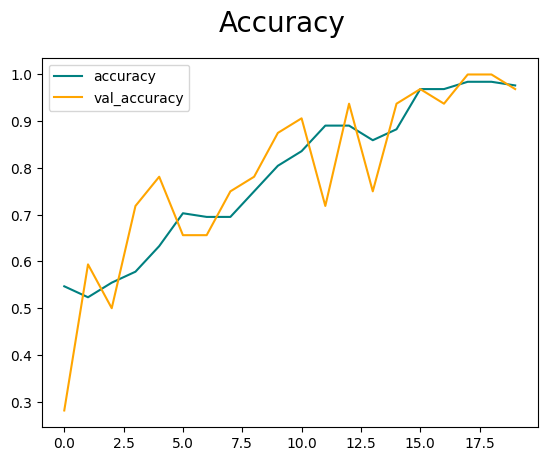

In [58]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## 4. Evaluate Performance

### 4.1 Evaluate

In [59]:
#import key metrics
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy #measures we use for classification probs

In [60]:
# to use these, we need to establish instances of them
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [61]:
#in order to test them out
for batch in test.as_numpy_iterator(): #loops thru each batch in testing data
    X, y = batch #unpacks it--X set of images--y true val
    yhat = model.predict(X) #yhat=y predicted val--passing thru img data to our mmodel--make predictions--returns vals bw 0 nd 1
    pre.update_state(y, yhat) #updates out metrics
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
    #to see how it performs on our test data

1/1 [==============================] - 3s 3s/step


In [63]:
#print our results
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')
#high valm means performing good

Precision:1.0, Recall:1.0, Accuracy:1.0


### 4.2 Test

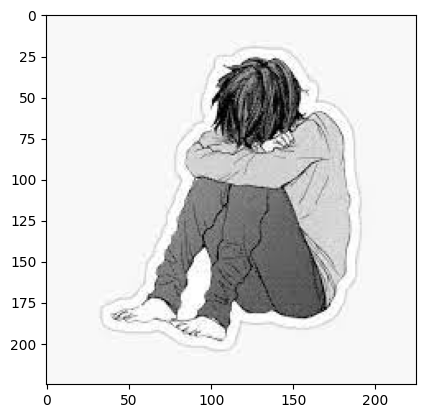

In [90]:
img = cv2.imread('sadTest1.jpg') #an img our model has never seen before--opencv reads as bgr
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

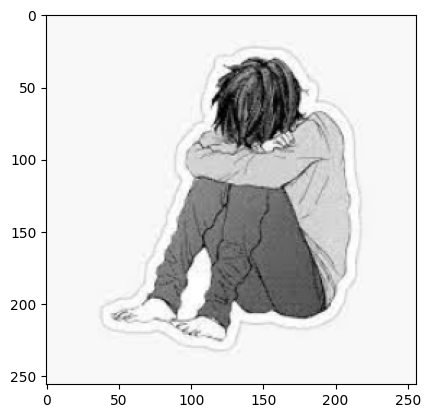

In [91]:
resize = tf.image.resize(img, (256,256)) #the data passed thru needs to be 256x256 pxs--resizes
plt.imshow(resize.numpy().astype(int))
plt.show()

In [85]:
#checking
resize.shape

TensorShape([256, 256, 3])

In [86]:
#checking
np.expand_dims(resize,0).shape # wraps in another set of arrays

(1, 256, 256, 3)

In [92]:
yhat = model.predict(np.expand_dims(resize/255, 0)) #neural network expects a batch of imgs not a single one
#we need to encapsulate it in another set of arrays--also scaling it

1/1 [==============================] - 0s 74ms/step


In [93]:
yhat

array([[0.6923387]], dtype=float32)

In [94]:
#printing op
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


## 5. Save the Model

In [97]:
from tensorflow.keras.models import load_model #to load model

In [98]:
model.save(os.path.join('models','happy_sad_model.h5')) #saves the model--h5:serializing the model onto something we can store
#as a disc

In [100]:
#checking path
os.path.join('models','happy_sad_model.h5')

'models\\happy_sad_model.h5'

In [101]:
new_model = load_model(os.path.join('models','happy_sad_model.h5')) #reloading the model

In [102]:
#checking
new_model

In [104]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0)) #pass data to it to predict

1/1 [==============================] - 0s 67ms/step


In [105]:
if yhat_new > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
